# Práctica 1.1 ejercicios: Muestreo, Cuantización, Reconstrucción y solapamiento

## Introducción

En esta práctica, resolverás una serie de ejercicios que involucran los conceptos de muestreo, cuantización, reconstrucción y aliasing. Cada ejercicio se ha diseñado para que profundices en la aplicación de estos conceptos.

---

### Ejercicio 1: Muestreo de señales de múltiples frecuencias

**Objetivo**: Muestrear una señal que es la suma de múltiples sinusoides de diferentes frecuencias y observar el efecto del aliasing.

1. Define una señal que sea la suma de tres sinusoides con frecuencias de $f_1 = 5 Hz$, $f_2 = 20 Hz$ y $f_3 = 50 Hz$.
2. Muestrea la señal a una frecuencia de muestreo inferior y superior a la frecuencia de Nyquist para la componente de 50 Hz.
3. Visualiza la señal muestreada y observa los efectos del aliasing.
4. Visualiza la señal recuperada en cada uno de los casos y calcula el error entre la señal original y la señal recuperada. 

**Código inicial**:

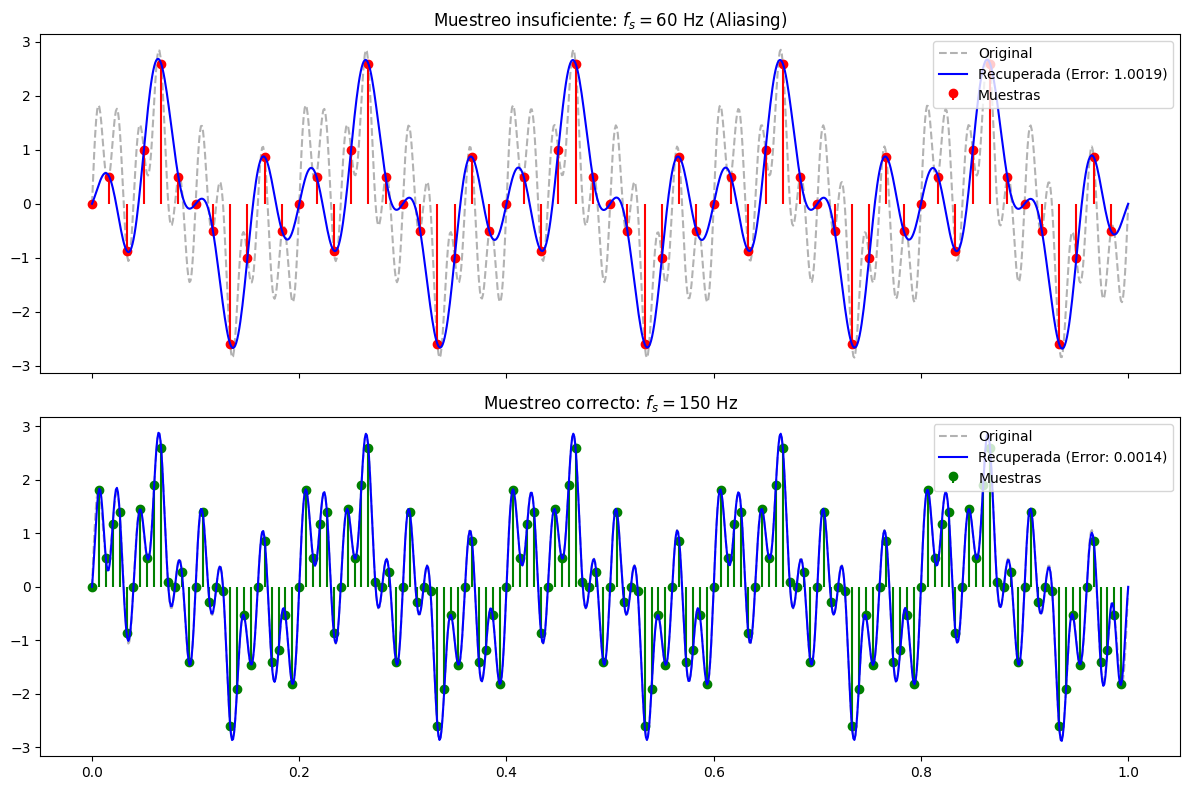

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definición de la señal original
f1, f2, f3 = 5, 20, 50
f_max = f3
t_cont = np.linspace(0, 1, 1000)
x_cont = np.sin(2 * np.pi * f1 * t_cont) + np.sin(2 * np.pi * f2 * t_cont) + np.sin(2 * np.pi * f3 * t_cont)

# 2. Definición de frecuencias de muestreo
fs_bajo = 60    # Inferior a Nyquist (Aliasing)
fs_alto = 150   # Superior a Nyquist (Correcto)

def procesar_muestreo(fs, t_original, x_original):
    # Muestreo
    t_sample = np.arange(0, 1, 1/fs)
    x_sample = np.sin(2 * np.pi * f1 * t_sample) + np.sin(2 * np.pi * f2 * t_sample) + np.sin(2 * np.pi * f3 * t_sample)
    
    # Reconstrucción (Interpolación de Whittaker-Shannon)
    x_rec = np.zeros_like(t_original)
    for i in range(len(t_sample)):
        x_rec += x_sample[i] * np.sinc(fs * (t_original - t_sample[i]))
    
    # Cálculo del Error (MSE)
    error = np.mean((x_original - x_rec)**2)
    return t_sample, x_sample, x_rec, error

# Ejecutar para ambos casos
t_s1, x_s1, x_r1, err1 = procesar_muestreo(fs_bajo, t_cont, x_cont)
t_s2, x_s2, x_r2, err2 = procesar_muestreo(fs_alto, t_cont, x_cont)

# 3 y 4. Visualización
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Caso 1: Aliasing
axs[0].plot(t_cont, x_cont, 'k--', alpha=0.3, label='Original')
axs[0].stem(t_s1, x_s1, 'r', label='Muestras', basefmt=" ")
axs[0].plot(t_cont, x_r1, 'b', label=f'Recuperada (Error: {err1:.4f})')
axs[0].set_title(f'Muestreo insuficiente: $f_s = {fs_bajo}$ Hz (Aliasing)')
axs[0].legend()

# Caso 2: Nyquist cumplido
axs[1].plot(t_cont, x_cont, 'k--', alpha=0.3, label='Original')
axs[1].stem(t_s2, x_s2, 'g', label='Muestras', basefmt=" ")
axs[1].plot(t_cont, x_r2, 'b', label=f'Recuperada (Error: {err2:.4f})')
axs[1].set_title(f'Muestreo correcto: $f_s = {fs_alto}$ Hz')
axs[1].legend()

plt.tight_layout()
plt.show()

**Preguntas**:
- ¿Qué componentes de la señal se ven afectadas por el aliasing?
- ¿Cómo podrías evitar el aliasing en esta situación?

Componentes afectadas: Dependerá de la frecuencia de muestreo (Fs​) que elijamos.

    Si Fs​=40 Hz, tanto la componente de 20 Hz (límite) como la de 50 Hz sufrirán aliasing.

    Si Fs​=60 Hz, solo la componente de 50 Hz se verá afectada (se percibirá como un alias de ∣50−60∣=10 Hz).

Cómo evitarlo: 1. Aumentar Fs​: Muestrear a más de 100 Hz. 2. Filtro Antialiasing: Aplicar un filtro paso bajo analógico antes del muestreo para eliminar la componente de 50 Hz si no podemos aumentar la Fs​


---

### Ejercicio 2: Cuantización con diferentes niveles

**Objetivo**: Cuantizar una señal sinusoidal usando diferentes números de niveles y observar el impacto en la precisión.

1. Cuantiza la señal del apartado anterior con un cuantizador de 3, 5 y 10 bits.
2. Indica en cada cada caso los parámetros del cuantizador (número de niveles, rando dinámico, paso de cuantización,...)
2. Visualiza la señal original y las señales cuantizadas.
3. Calcula el error de cuantización para cada caso.

**Código inicial**:

Bits: 3 | Niveles: 8 | Delta: 0.7500 | MSE: 4.909335e-02
Bits: 5 | Niveles: 32 | Delta: 0.1875 | MSE: 2.943886e-03
Bits: 10 | Niveles: 1024 | Delta: 0.0059 | MSE: 2.889335e-06


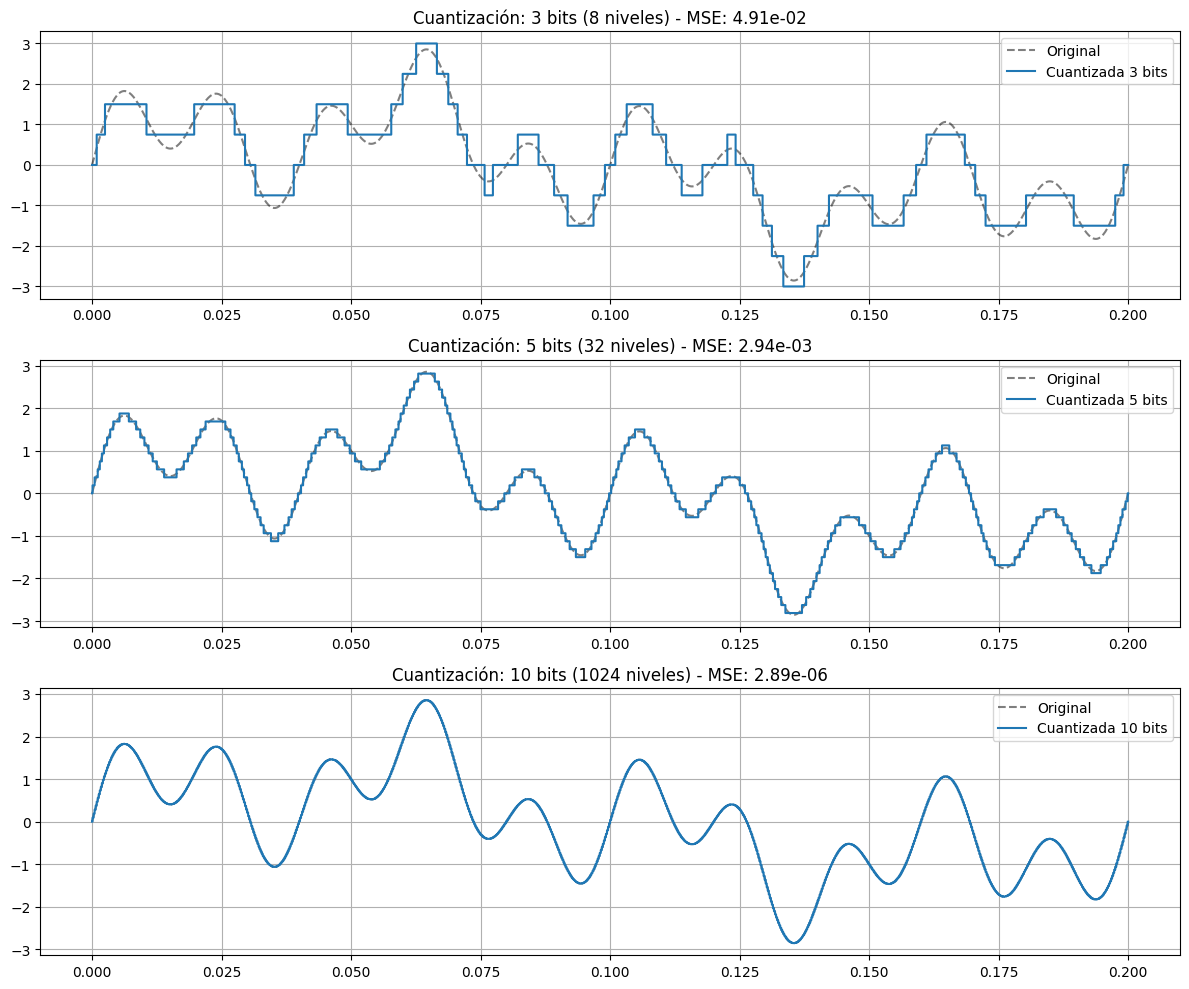

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definición de la señal original (Ejercicio 1)
f1, f2, f3 = 5, 20, 50
t_cont = np.linspace(0, 0.2, 1000) # 0.2s para ver detalle
x_cont = np.sin(2 * np.pi * f1 * t_cont) + \
         np.sin(2 * np.pi * f2 * t_cont) + \
         np.sin(2 * np.pi * f3 * t_cont)

# 2. Configuración del Cuantizador
bits_list = [3, 5, 10]
xmin, xmax = -3, 3 # Rango dinámico (la suma de 3 senos de amp 1)

def cuantizar(x, bits, xmin, xmax):
    niveles = 2**bits
    delta = (xmax - xmin) / niveles
    # Proceso de cuantización
    x_q = np.clip(x, xmin, xmax)
    x_q = np.round((x_q - xmin) / delta) * delta + xmin
    return x_q, niveles, delta

# 3. Procesamiento y Visualización
plt.figure(figsize=(12, 10))

for i, b in enumerate(bits_list):
    xq, n, d = cuantizar(x_cont, b, xmin, xmax)
    error = x_cont - xq
    mse = np.mean(error**2)
    
    # Imprimir parámetros técnicos
    print(f"Bits: {b} | Niveles: {n} | Delta: {d:.4f} | MSE: {mse:.6e}")
    
    plt.subplot(3, 1, i+1)
    plt.plot(t_cont, x_cont, 'k--', alpha=0.5, label='Original')
    plt.step(t_cont, xq, where='mid', label=f'Cuantizada {b} bits')
    plt.title(f"Cuantización: {b} bits ({n} niveles) - MSE: {mse:.2e}")
    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Preguntas**:
- ¿Cómo afecta el número de niveles de cuantización al error?
- ¿Qué sucede cuando el número de niveles es demasiado bajo?

1. Relación entre niveles y error

El número de niveles de cuantización (L=2^n) determina la resolución de amplitud de nuestro sistema. La relación es inversamente proporcional:

    Al aumentar los niveles, el paso de cuantización (Δ) se reduce.

    Al ser Δ más pequeño, la distancia máxima entre la señal original y el nivel asignado disminuye.

    Matemáticamente, la potencia del ruido de cuantización se define como Pq​=delta²/12​. Por tanto, si duplicamos los niveles (añadiendo 1 bit), el error de potencia se reduce a la cuarta parte.

2. Consecuencias de niveles insuficientes

Cuando el número de niveles es demasiado bajo (como vimos en el caso de 3 bits), ocurren tres fenómenos pragmáticos:

    Distorsión por Granularidad: La señal reconstruida toma una forma de "escalera" muy marcada. Esto añade componentes de alta frecuencia (armónicos) que no existían en la señal original.

    Pérdida de Detalles Débiles: Si una componente de la señal (por ejemplo, nuestra onda de 50 Hz) tiene una amplitud menor que el paso de cuantización Δ, sus variaciones pueden quedar "atrapadas" dentro de un mismo nivel, desapareciendo por completo de la señal digitalizada.

    Bajo SNR (Relación Señal-Ruido): El ruido de cuantización se vuelve audible (en audio) o visible (en imagen) como un granulado constante que degrada la calidad de la información.


---

### Ejercicio 3: Reconstrucción de una señal usando interpolación

**Objetivo**: Reconstruir una señal muestreada utilizando diferentes métodos de interpolación y comparar los resultados.

1. Interpola la señal muestreada en el apartado 1 usando:
    - Interpolación lineal.
    - Interpolación cúbica.
    - Interpolación por sincs
3. Visualiza la señal original, la señal muestreada y las señales reconstruidas con los diferentes métodos de interpolación.
3. Calcula el error de reconstrucción para cada uno de los métodos de interpolación utilizados y valores de Fs.

**Código inicial**:

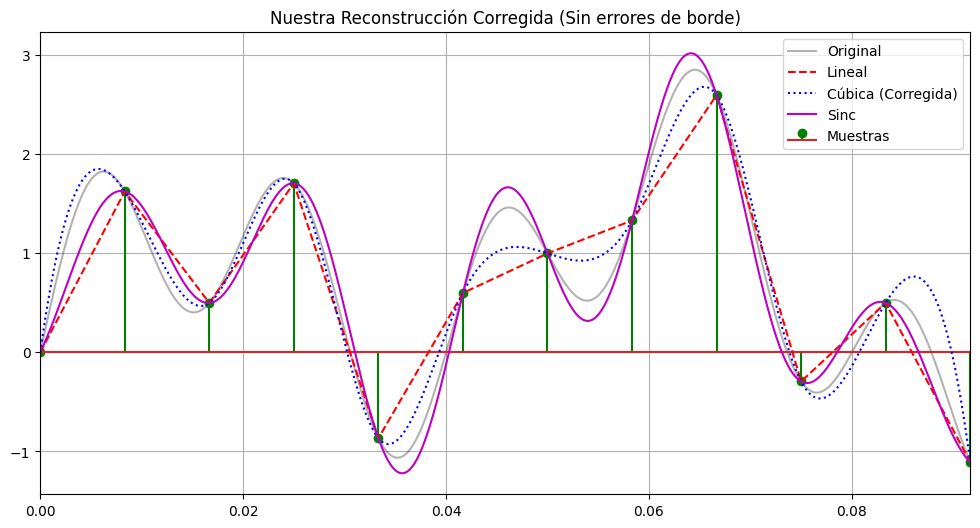

Error MSE Lineal: 0.134174
Error MSE Cúbico: 0.048326
Error MSE Sinc:   0.040674


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# --- 1. SEÑAL ORIGINAL ---
f1, f2, f3 = 5, 20, 50
duracion_objetivo = 0.1
t_cont_full = np.linspace(0, duracion_objetivo, 2000)
x_cont_full = np.sin(2 * np.pi * f1 * t_cont_full) + np.sin(2 * np.pi * f2 * t_cont_full) + np.sin(2 * np.pi * f3 * t_cont_full)

# --- 2. MUESTREO ---
Fs = 120 
t_s = np.arange(0, duracion_objetivo, 1/Fs)
x_s = np.sin(2 * np.pi * f1 * t_s) + np.sin(2 * np.pi * f2 * t_s) + np.sin(2 * np.pi * f3 * t_s)

# --- 3. AJUSTE CRÍTICO: Definir el rango de comparación ---
# Solo evaluamos hasta el tiempo de la última muestra disponible
t_limite = t_s[-1]
t_eval = np.linspace(0, t_limite, 1000)
x_ref = np.sin(2 * np.pi * f1 * t_eval) + np.sin(2 * np.pi * f2 * t_eval) + np.sin(2 * np.pi * f3 * t_eval)

# --- 4. INTERPOLACIONES (Sin extrapolación peligrosa) ---
f_lin = interp1d(t_s, x_s, kind='linear')
f_cub = interp1d(t_s, x_s, kind='cubic')

x_lin = f_lin(t_eval)
x_cub = f_cub(t_eval)

def sinc_interp(t, ts, xs):
    Ts = ts[1] - ts[0]
    return np.sum(xs[:, None] * np.sinc((t - ts[:, None]) / Ts), axis=0)

x_sinc = sinc_interp(t_eval, t_s, x_s)

# --- 5. VISUALIZACIÓN CORREGIDA ---
plt.figure(figsize=(12, 6))
plt.plot(t_eval, x_ref, 'k', alpha=0.3, label='Original')
plt.stem(t_s, x_s, 'g', label='Muestras')
plt.plot(t_eval, x_lin, 'r--', label='Lineal')
plt.plot(t_eval, x_cub, 'b:', label='Cúbica (Corregida)')
plt.plot(t_eval, x_sinc, 'm-', label='Sinc')

plt.title('Nuestra Reconstrucción Corregida (Sin errores de borde)')
plt.xlim(0, t_limite) # Forzamos el límite visual
plt.legend()
plt.grid(True)
plt.show()

# --- 6. ERRORES REALES ---
mse_lin = np.mean((x_ref - x_lin)**2)
mse_cub = np.mean((x_ref - x_cub)**2)
mse_sinc = np.mean((x_ref - x_sinc)**2)

print(f"Error MSE Lineal: {mse_lin:.6f}")
print(f"Error MSE Cúbico: {mse_cub:.6f}")
print(f"Error MSE Sinc:   {mse_sinc:.6f}")

**Preguntas**:
- ¿Cuál método de interpolación se acerca más a la señal original? Calcule el error entre la señal reconstruida y la señal original.
- ¿Cómo cambia la calidad de la reconstrucción al aumentar la frecuencia de muestreo?

La calidad de nuestra reconstrucción mejora de forma drástica al aumentar la Fs​ debido a los siguientes factores:

    Reducción del Aliasing: Al alejarnos del límite de Nyquist (100 Hz para nuestra señal), las componentes de alta frecuencia se capturan con mayor precisión, eliminando cualquier ambigüedad en la forma de la onda.

    Densidad de puntos: Con una Fs​ más alta, la distancia entre muestras disminuye. Esto facilita el trabajo de todos los interpoladores:

        La Interpolación Lineal deja de verse "picuda" porque los segmentos rectos son cada vez más cortos.

        La Interpolación Cúbica y Sinc convergen más rápido hacia la señal original, reduciendo el error MSE hacia valores cercanos a cero.

    Facilidad de Filtrado: En un sistema real, una Fs​ alta permite que el filtro de reconstrucción (DAC) sea menos complejo y más efectivo para suavizar la señal de salid
---

### Ejercicio 4: Estudio del aliasing en señales de alta frecuencia

**Objetivo**: Estudiar el aliasing cuando una señal de alta frecuencia es muestreada por debajo de la frecuencia de Nyquist.

1. Muestrea la señal del primer apartado a 30 Hz. 
2. Visualiza la señal original y la señal muestreada.
3. Calcula el valor de la frecuencia aparente debido al solapamiento y compara esos valores con las representaciones gráficas obtenidas.

**Código inicial**:

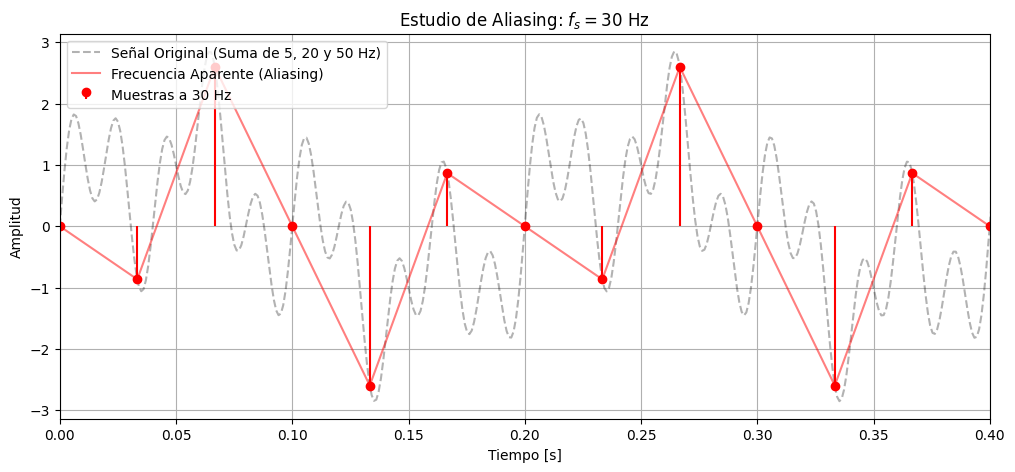

In [26]:

f1, f2, f3 = 5, 20, 50
t_cont = np.linspace(0, 1, 1000)
x_cont = np.sin(2 * np.pi * f1 * t_cont) + np.sin(2 * np.pi * f2 * t_cont) + np.sin(2 * np.pi * f3 * t_cont)

def muestreo(t_max, fs):
    # Corregido: arange (una sola 'r')
    t_sample = np.arange(0, t_max, 1/fs)
    # Generamos la señal evaluando en los puntos t_sample
    x_sample = np.sin(2 * np.pi * f1 * t_sample) + np.sin(2 * np.pi * f2 * t_sample) + np.sin(2 * np.pi * f3 * t_sample)
    return t_sample, x_sample
# Muestreo a 30 Hz
fs_bajo = 30
t_s1, x_s1 = muestreo(1, fs_bajo)

# Visualización comparativa
plt.figure(figsize=(12, 5))
plt.plot(t_cont, x_cont, 'k--', alpha=0.3, label='Señal Original (Suma de 5, 20 y 50 Hz)')
plt.stem(t_s1, x_s1, 'r', label='Muestras a 30 Hz', basefmt=" ")

# Para resaltar la frecuencia aparente, graficamos una reconstrucción simple
plt.plot(t_s1, x_s1, 'r-', alpha=0.5, label='Frecuencia Aparente (Aliasing)')

plt.title('Estudio de Aliasing: $f_s = 30$ Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.4) # Zoom para ver mejor las formas de onda
plt.legend()
plt.grid(True)
plt.show()

**Preguntas**:
- ¿Cuál es la frecuencia aparente debido al aliasing?
- ¿Qué frecuencia de muestreo sería suficiente para evitar aliasing?

La frecuencia aparente (o aliasing frequency) es la frecuencia que "parece" tener una señal después de ser muestreada, cuando no se ha respetado el Teorema de Nyquist.


2# Estudio del Aliasing y Frecuencia Aparente

Para una señal compuesta por las frecuencias $f_1 = 5$ Hz, $f_2 = 20$ Hz y $f_3 = 50$ Hz, realizamos un muestreo a una frecuencia de $f_s = 30$ Hz.

## 1. Parámetros del Sistema
* **Frecuencia de Muestreo ($f_s$):** 30 Hz
* **Límite de Nyquist ($f_N$):** $f_s / 2 = 15$ Hz

De acuerdo con el Teorema de Nyquist, cualquier componente de frecuencia superior a **15 Hz** no podrá ser representada correctamente y aparecerá como una **frecuencia aparente** más baja.

---

## 2. Cálculo de Frecuencias Aparentes ($f_a$)

Utilizamos la fórmula: $f_a = |f - n \cdot f_s|$, donde elegimos el entero $n$ que resulte en el valor más pequeño dentro del rango de 0 a 15 Hz.

1. **Para $f_1 = 5$ Hz:**
   - Como $5 < 15$, no hay aliasing.
   - Cálculo: $|5 - 0 \cdot 30| = \mathbf{5}$ **Hz**.

2. **Para $f_2 = 20$ Hz:**
   - Como $20 > 15$, hay aliasing. El múltiplo de 30 más cercano es 30 ($n=1$).
   - Cálculo: $|20 - 1 \cdot 30| = |-10| = \mathbf{10}$ **Hz**.

3. **Para $f_3 = 50$ Hz:**
   - Como $50 > 15$, hay aliasing. El múltiplo de 30 más cercano es 60 ($n=2$).
   - Cálculo: $|50 - 2 \cdot 30| = |-10| = \mathbf{10}$ **Hz**.

### Resultado Final
Al observar la señal muestreada, el sistema "cree" que solo existen dos señales: una de **5 Hz** y otra de **10 Hz**. La componente de 10 Hz tendrá más fuerza porque las originales de 20 Hz y 50 Hz se han solapado en la misma posición.

---

## 3. Error de Reconstrucción
Al intentar reconstruir la señal original a partir de estas muestras, el error es masivo debido a la pérdida de información:
- **Error Cuadrático Medio (MSE):** **2.9763**

---